# <center>Lab session 4: Secure Multi-Party Computing </center> <center>computer section - Task 4 & 5</center>

In [1]:
import numpy as np
import random
import string
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt
from decimal import Decimal
from Crypto.PublicKey import RSA
import sys
sys.set_int_max_str_digits(100000000)

# TASK 4 - Implementing Shamir's Secret Sharing
### Start by defining the problem space (i.e. the context for the secret sharing). $t$ is the threshold value where if someone holds $\leq t$ shares, the secret cannot be reconstructed, and $>t$ shares can reveal the secret.
### TO DO #1: Define variables
#### First, first define a large positive prime $q$. Your max value will be $q-1$. $q$ it must be quite big to allow for a wide range of numbers to be created.

In [ ]:
#Define the number of participants
n= 
#Define your threshold value. Make sure that t < n
t = 
#Define your secret (int)
s = 
#Define your maximum value of the coefficients a in the polynomial expression. 
q = 
maxA = q-1

### Shamir's secret sharing consists of first creating a polynomial $f(x)$ of degree $t-1$, as shown below.
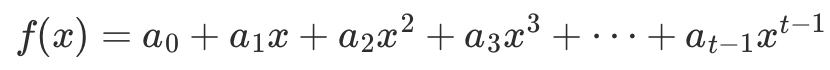
### Remember, $a_0$ is the secret to be concealed. 
### $t-1$ coefficients are created and multiplied by the same value $x$, with increasing exponents.
### TO DO #2: Create your coefficients

In [ ]:
def create_all_coefficients_a(threshold, secret, max_value):
    '''Create t coefficients, including the secret initial value
    Parameters
    ------------
        threshold: int
            The polynomial degree + 1
        secret: int
            The secret value that we wish to share
        max_value: int
            The max total value of each coefficient
    Return
    -----------
        coeff : The list of all coefficients of the polynomial curve being constructed.
    '''
    coefficients = []

    return coefficients

In [ ]:
coefs = create_all_coefficients_a(t, s, maxA)
print(f"The list of generated coefficients go as follow:\n{coefs}.\n\
\nVerify that the first element is a0, the secret.")

### Now you are ready to create a function which can compute a unique random polynomial based on the coefficients.


### TO DO #3: Create a function that computes $f(x)$ using the coefficients. 
##### Tip: this function will take in an x-value you haven't defined yet.

In [ ]:
def compute_polynomial_for_x(x, coefficients):
    '''Creates a tuple with the (x, y) coordinates of a single point on the polynomial curve
    Parameters
    ------------
        x: int
            None specific value assigned to x for a point on the curve
        coefficients: list
            List of t coefficients randomly generated, where the 1st element is the secret to be shared
    Return
    -----------
        f : A single y-axis coordinate which is equal to the total of f(x)
    '''

    return f

### You can try to generate the first share, by choosing a value of $x$. Remember $x$ is an integer (eg. 1, 2, 3, 4...), and the max value of $x$ should be much much larger than $n$, to be able to generate unique $x$ values $n$ times fast.
### TO DO #3: set the maximum value of $x$ (if you decide to generated random $x$ values) and generate $x$.

In [ ]:
maxX = 
x = 

### The result of your function a single point of coordinate ($x$, $f(x)$). This could be the first share. 
### TO DO #5: Generate with a function as many shares (based on distinct randomly generated $x$ values) as there are participants.

In [ ]:
def generate_shares(n, coefficients, max_value_of_x):
    '''Creates a list of tuples with the (x, y) coordinates for each point on the polynomial curve
    Parameters
    ------------
        n: int
            Number of points/shares to generate, based on the number of participants; 
            will define the length of the list
        coefficients: list
            List of all the coefficients a0, a1, ... a(t-1).
        max_value_of_x: int
            The max value of x.
    Return
    -----------
        shares : 
            The list of points on the polynomial curves, 
            which constitute each share created and sent to each
        participants (e.g. [(x1, y1), (x2, y2),...])
    '''
    shares = []
    x_list = []
    return shares

In [ ]:
all_shares = generate_shares(n, coefs, maxX)

### You can now visualize the shares in one single polynomial.

In [ ]:
dataset = sorted(all_shares, key=lambda x: x[0])
x_points = [i[0] for i in dataset]
y_points = [i[1] for i in dataset]
labels = [f"P{i}" for i in range(1, n+1)]

X_Y_Spline = make_interp_spline(x_points, y_points, k=t-1)
X_ = np.linspace(min(x_points)-1, max(x_points)+1, maxX)
Y_ = X_Y_Spline(X_)
plt.plot(X_, Y_, "-b")
plt.plot(x_points, y_points, 'or')

plt.title(f"Congratulations! Here is your polynomial curve.\n You have \
created {n} shares, one per participants.", fontsize=18, fontweight="bold")
plt.xlabel("x", fontsize=20, fontweight="bold")
plt.ylabel("f(x)", fontsize=20, fontweight="bold")
for i, txt in enumerate(labels):
    plt.annotate(txt, (x_points[i], y_points[i]), textcoords="offset points",\
                 xytext=(-1,15), ha='center')
plt.show()

### This polynomial is the only polynomial of a given degree $t-1$ (line) $f(x)$ that goes through all the points. It is based on the coefficients you generated. The coefficients are unknown to others, and supposedly, none of the participants (or at least less than $t$ number of participants) are at risk of colluding maliciously.
### The secret is at $x = 0$, the intercept of this line. Because the others don't know the coefficients, and if each person knows less than $t$ shares, all values between 0 and $q-1$ could be a secret. Holding less than $t$ shares thus results in *no* chance of guessing the right polynomial, and thus finding the intercept $x=0$ where $f(0) = $ the secret.

# LAGRANGE RECONSTRUCTION
### Now... how can we reconstruct the secret with at least $t$ shares? 
### We will use the Lagrange Interpolation to construct a function $f'(x)$. 
###  $f'(x)$ is an (imperfect) polynomial that passes through at least $t$ out of $n$ shares. Assume you only have $t$ shares in your possession. There needs to be $t$ values of $x$ and $t$ coefficients in your new function  $f'(x)$ . 


## The task is to build such a polynomial, which goes through $t$ shares.
## The ultimate goal is to find $y_0$ (or $f'(0)$) for $x=0$ (the intercept). This, $y_0$, will be the secret!
### First, here are the shares you have:

In [ ]:
t_shares = all_shares[:t]

### The interpolation goes as follows:
### For each $x_i$ values in your $t$ shares, you have to calculate $\Pi\frac{x_{j}}{x_{j} - x_i}$ with $j\in\{0,\ldots,t-1\}\setminus\{i\}$
### At all times, $j \neq i$.
##### That means, each value of $x_i$ you have is subtracted by the value of $x_{j}$, that is, any $x$ value from a share coordinate that is not the share of interest, $x_i$. The next $x$ (called $x_{j}$) is divided by the result of your subtraction. The final result is then multiplied (hence the product sign $\Pi$) by the result of the next iteration, involving the same $x_i$ and every other $x_{j}$ you have. You do this once for each value of $x_i$.
### Then, you have to multiply the final result of this iterative process for all $x_i$ with $y_i$, that is, the corresponding $y$-value for the $x$ you chose. 
##### (e.g. for share (1, 42), 1 is your $x$ and 42 is the corresponding $y$)
### How was this algorithm constructed? Why does this algorithm work? To understand exactly this, please watch the following video thoroughly:
https://www.youtube.com/watch?v=kkMps3X_tEE
### You then repeat this 2-step process for every value of $x_i$ and sum every result along the way.
### Magic... the final sum is equal to your secret!

In [ ]:
def reconstruct_secret(t_shares):
    '''Reconstruct original secret from t shares or more.
    Parameters
    ------------
        shares: list
            List of tuples with the coordinates of t shares or more.
    Return
    -----------
        secret : The original secret value
    '''
    sums = 0
    for i, share_i in enumerate(t_shares):
        xi, yi = share_i
#         ...
        for j, share_j in enumerate(t_shares):
            xj, _ = share_j
            if i != j:
                ...
# Now multiply the products of products with yi
        ...
        ...
        ...    
    return int(round(Decimal(sums), 0))

In [ ]:
secret_reconstructed = reconstruct_secret(t_shares)
print(f"The result of your interpolation is {secret_reconstructed}. This should be equal to the original\
 secret {s}!!!")

### Lastly, you can see that if you use less than t shares, this will not work.

In [ ]:
less_than_t_shares = t_shares[:-2]
secret_from_few_shares = reconstruct_secret(less_than_t_shares)
print(f"The result of your interpolation is {secret_from_few_shares}. This should NOT be equal to the original\
 secret {s}!!!")

# TASK 5 - IMPLEMENTING A 1-OUT-OF-$2$ OBLIVIOUS TRANSFER PROTOCOL using RSA.
### You have two parties. Alice has $2$ messages to send to Bob. 
### There is no function $f()$. The goal is simply for Bob to choose 1 message from Alice without learning anything about the 2nd message, and for Alice to not learn which message Bob chose.
### TO DO #1: Define l (length of the messages)

In [5]:
l = 16

### Right two classes, Alice() and Bob() containing the functions, in order, performing each operations of the RSA-based 1-out-of-2 Oblivious Transfer

In [6]:
class Alice:
    def __init__(self):
        pass
    def create_n_msgs(self, n_value, l_value):
        """Create n  l-bit messages. 
        Return a list of n strings."""
        msgs = []
        msgs.extend([(''.join(random.choices(string.ascii_lowercase, k=l_value))) for i in range(n_value)])
        return msgs
    
    def generateKeys(self):
        key = RSA.generate(1024)
        e = key.e
        d = key.d
        N = key.n

        private_key, public_key = d, (e, N)
        return private_key, public_key
        
    def generate_2_x(self):
        return random.sample(range(1, 10), 2)  
    

class Bob:
    def __init__(self):
        pass
    
    def generate_r(self):
        return random.randint(0, 1)
    
    def generate_k(self):
        return random.randint(1, 10)

### TO DO #2: Generate two messages of l-length, as Alice

In [7]:
messages_of_alice = Alice().create_n_msgs(2, l)

### TO DO #3: Generate assymetric key pairs, as Alice
tip: use RSA library

In [8]:
publicKey = Alice().generateKeys()[1]
privateKey = Alice().generateKeys()[0]

### Alice then sends the public key of format $(e, N)$ to Bob


### TO DO #4: Generate two random x values, as Alice

In [10]:
two_x_of_alice = Alice().generate_2_x()

### Alice then sends both random x values to Bob

### TO DO #5: Choose a random integer 0 or 1, as Bob

In [11]:
r_of_bob = Bob().generate_r()

### TO DO #6: Choose a random value k, as Bob

In [12]:
k_of_bob = Bob().generate_k()

### TO DO #7: Bob computes $v = x_c + k^e$ and sends it to Alice

In [13]:
v = two_x_of_alice[r_of_bob] + (k_of_bob)**publicKey[0]


### TO DO #8: Alice computes $k_0 = (v-x_0)^d$ and $k_1 = (v-x_1)^d$

In [ ]:
kzero_alice = (v - two_x_of_alice[0])**privateKey
kone_alice = (v - two_x_of_alice[1])**privateKey

### TO DO #9: Alice computes and sends to bob both $m'_0 = m_0 + k_0$ and $m'_1 = m_1 + k_1$

In [ ]:
m_prime_zero = messages_of_alice + kzero_alice
m_prime_one = messages_of_alice + kone_alice

m_to_bob = (m_prime_zero, m_prime_one)

### TO DO #10: Bob computes $m_r = m'_r - k$ and learns nothing of $m_{1-r}$

In [ ]:
decrypted_m = m_to_bob[r_of_bob] - k_of_bob

# Check if you are right:

In [ ]:
assert decrypted_m == messages_of_alice[k_of_bob]

# TO DO AT HOME: 1-out-of-n Oblivious Transfer, also based on RSA.